In [1]:
import sklearn
sklearn.__version__

'0.20.3'

In [2]:
!pip install sklearn


  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [3]:
import sklearn
sklearn.__version__

'0.20.3'

In [5]:
import pandas as pd
weather=pd.read_csv("C:/Users/Administrator/Downloads/weather_data.csv")
weather.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [70]:
import pandas as pd     #For general purpose Data Manipulation
import numpy as np  #For some operations - creating vectors and matrices/log transformation
from matplotlib.backends.backend_pdf import PdfPages #Plotting Box-Whisker
from matplotlib import pyplot as plt #Plotting Box-Whisker --> Outlier Detection
import seaborn as sns  #Plotting Box-Whisker and others
from sklearn.model_selection import train_test_split  #For Building Train and Test Set
from sklearn.linear_model import LinearRegression    #For Regression Analysis
from sklearn.preprocessing import LabelEncoder #for the columns who will suffer from curse of dimensionality
from sklearn.preprocessing import OneHotEncoder #with less number of columns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [7]:
y=weather["Play"]
x=weather.drop(["Play"],axis=1)

In [8]:
print(y.shape)
print(x.shape)

(14,)
(14, 4)


In [9]:
sklearn.__version__

'0.21.0'

In [10]:
x_dummies=pd.get_dummies(x)
x_dummies.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0


In [11]:
x_dummies.shape

(14, 10)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,test_size=0.3,random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
#Default criterion is gini indicating gini impurity.
#use "entropy" if you want to use info gain for the split
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
dcf=DecisionTreeClassifier()
cols=list(x_dummies.columns.values)
cols


['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']

In [28]:
pip install --user --upgrade scikit-learn==0.21.0

  Using cached https://files.pythonhosted.org/packages/14/df/12398d6bb3500f47904135a3d2459f644e5b71bade7a75ab72f107e032af/scikit_learn-0.21.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


Could not install packages due to an EnvironmentError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Administrator\\AppData\\Roaming\\Python\\Python37\\site-packages\\joblib-0.14.0.dist-info\\RECORD'
Check the permissions.



In [16]:
import sklearn
sklearn.__version__

'0.21.0'

In [31]:
pip install --user --upgrade scikit-learn==0.21.0

Requirement already up-to-date: scikit-learn==0.21.0 in c:\users\administrator\appdata\roaming\python\python37\site-packages (0.21.0)
Note: you may need to restart the kernel to use updated packages.


In [21]:
y_pred=clf.predict(x_test)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [23]:
from sklearn import tree

In [24]:
y_test

8     Yes
6     Yes
4      No
11     No
2     Yes
Name: Play, dtype: object

In [26]:
cols=list(x_dummies.columns.values)
cols

['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']

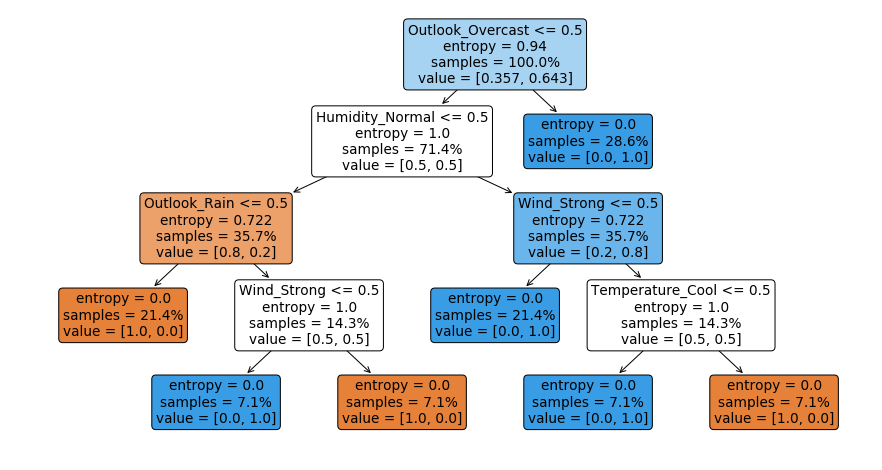

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols, filled=True, precision=3, proportion=True,rounded=True)
plt.show()

### DECISION-TREE CLASSIFICATION(Employee_Attrition.csv)

In [28]:
attri=pd.read_csv("C:/Users/Administrator/Downloads/employees_attrition.csv")

In [31]:
attri.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [47]:
x=attri.drop(["Attrition"],axis=1)

In [48]:
x.head() 

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [49]:
y=attri["Attrition"]
y.head()


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [50]:
x_dummies=pd.get_dummies(x)
x_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,test_size=0.3,random_state=0)

In [80]:
from sklearn.tree import DecisionTreeClassifier
#Default criterion is gini indicating gini impurity.
#use "entropy" if you want to use info gain for the split
clf=DecisionTreeClassifier(criterion="gini")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
dcf=DecisionTreeClassifier()
cols=list(x_dummies.columns.values)
cols


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'Jo

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols, filled=True, precision=3, proportion=True,rounded=True)
plt.show()

In [84]:
y_pred=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[371,   0],
       [  0,  70]], dtype=int64)

In [85]:
metrics.accuracy_score(y_pred,y_test)*100

100.0

In [74]:
#Tree needs to be chopped off from some point to avoid being big, hyperparameter tuning in decision 
#Tree machine learning it is called.

### Pruning

Also called as parameter tuning

Pruning helps us to avoid overfitting
Generally it is preferred to have a simple model, it avoids overfitting issue
Any additional split that does not add significant value is not worth while.
We can avoid overfitting by changing the pruning parameters like
max_leaf_nodes: Reduces the number of leaf nodes

min_samples_leaf:

Indicates the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model. The default value is 1.

For pruning, restrict the size of sample leaf
Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

max_depth

Indicates the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
For pruning, reduce the depth of the tree to build a generalized tree
Set the depth of the tree to 3, 5, 10 depending after verification on test data

### The parameter splitter indicates the strategy used to choose the split

In [155]:
clf=DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=13,min_samples_leaf=13,max_depth=13)

In [156]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=13,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

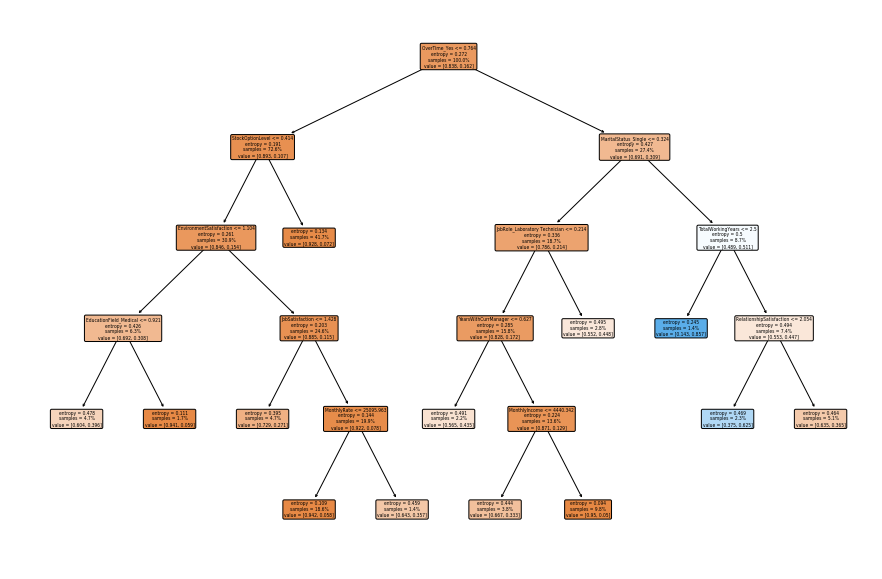

In [157]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [158]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [159]:
metrics.accuracy_score(y_pred,y_test)

0.8480725623582767